# Charts

In [3]:
# For data manipulation
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
    # sns.__version__

## Load Question 2 Results for what skills are required for these top paying roles?

In [4]:
# Load dataset into a dataframe
# no5 = pd.read_csv('', index_col = 0) | use this to remove index column
no2 = pd.read_csv('project/2_top_paying_job_skills_results.csv')

# Display first few rows of the dataframe
no2

,job_id,job_title,salary_year_avg,name,skills
0,40145,Staff Data Scientist/Quant Researcher,550000.0,Selby Jennings,sql
1,40145,Staff Data Scientist/Quant Researcher,550000.0,Selby Jennings,python
2,1714768,Staff Data Scientist - Business Analytics,525000.0,Selby Jennings,sql
3,1131472,Data Scientist,375000.0,Algo Capital Group,sql
4,1131472,Data Scientist,375000.0,Algo Capital Group,python
5,1131472,Data Scientist,375000.0,Algo Capital Group,java
6,1131472,Data Scientist,375000.0,Algo Capital Group,cassandra
7,1131472,Data Scientist,375000.0,Algo Capital Group,spark
8,1131472,Data Scientist,375000.0,Algo Capital Group,hadoop
9,1131472,Data Scientist,375000.0,Algo Capital Group,tableau


**Plot Top 10 Skills and Count**

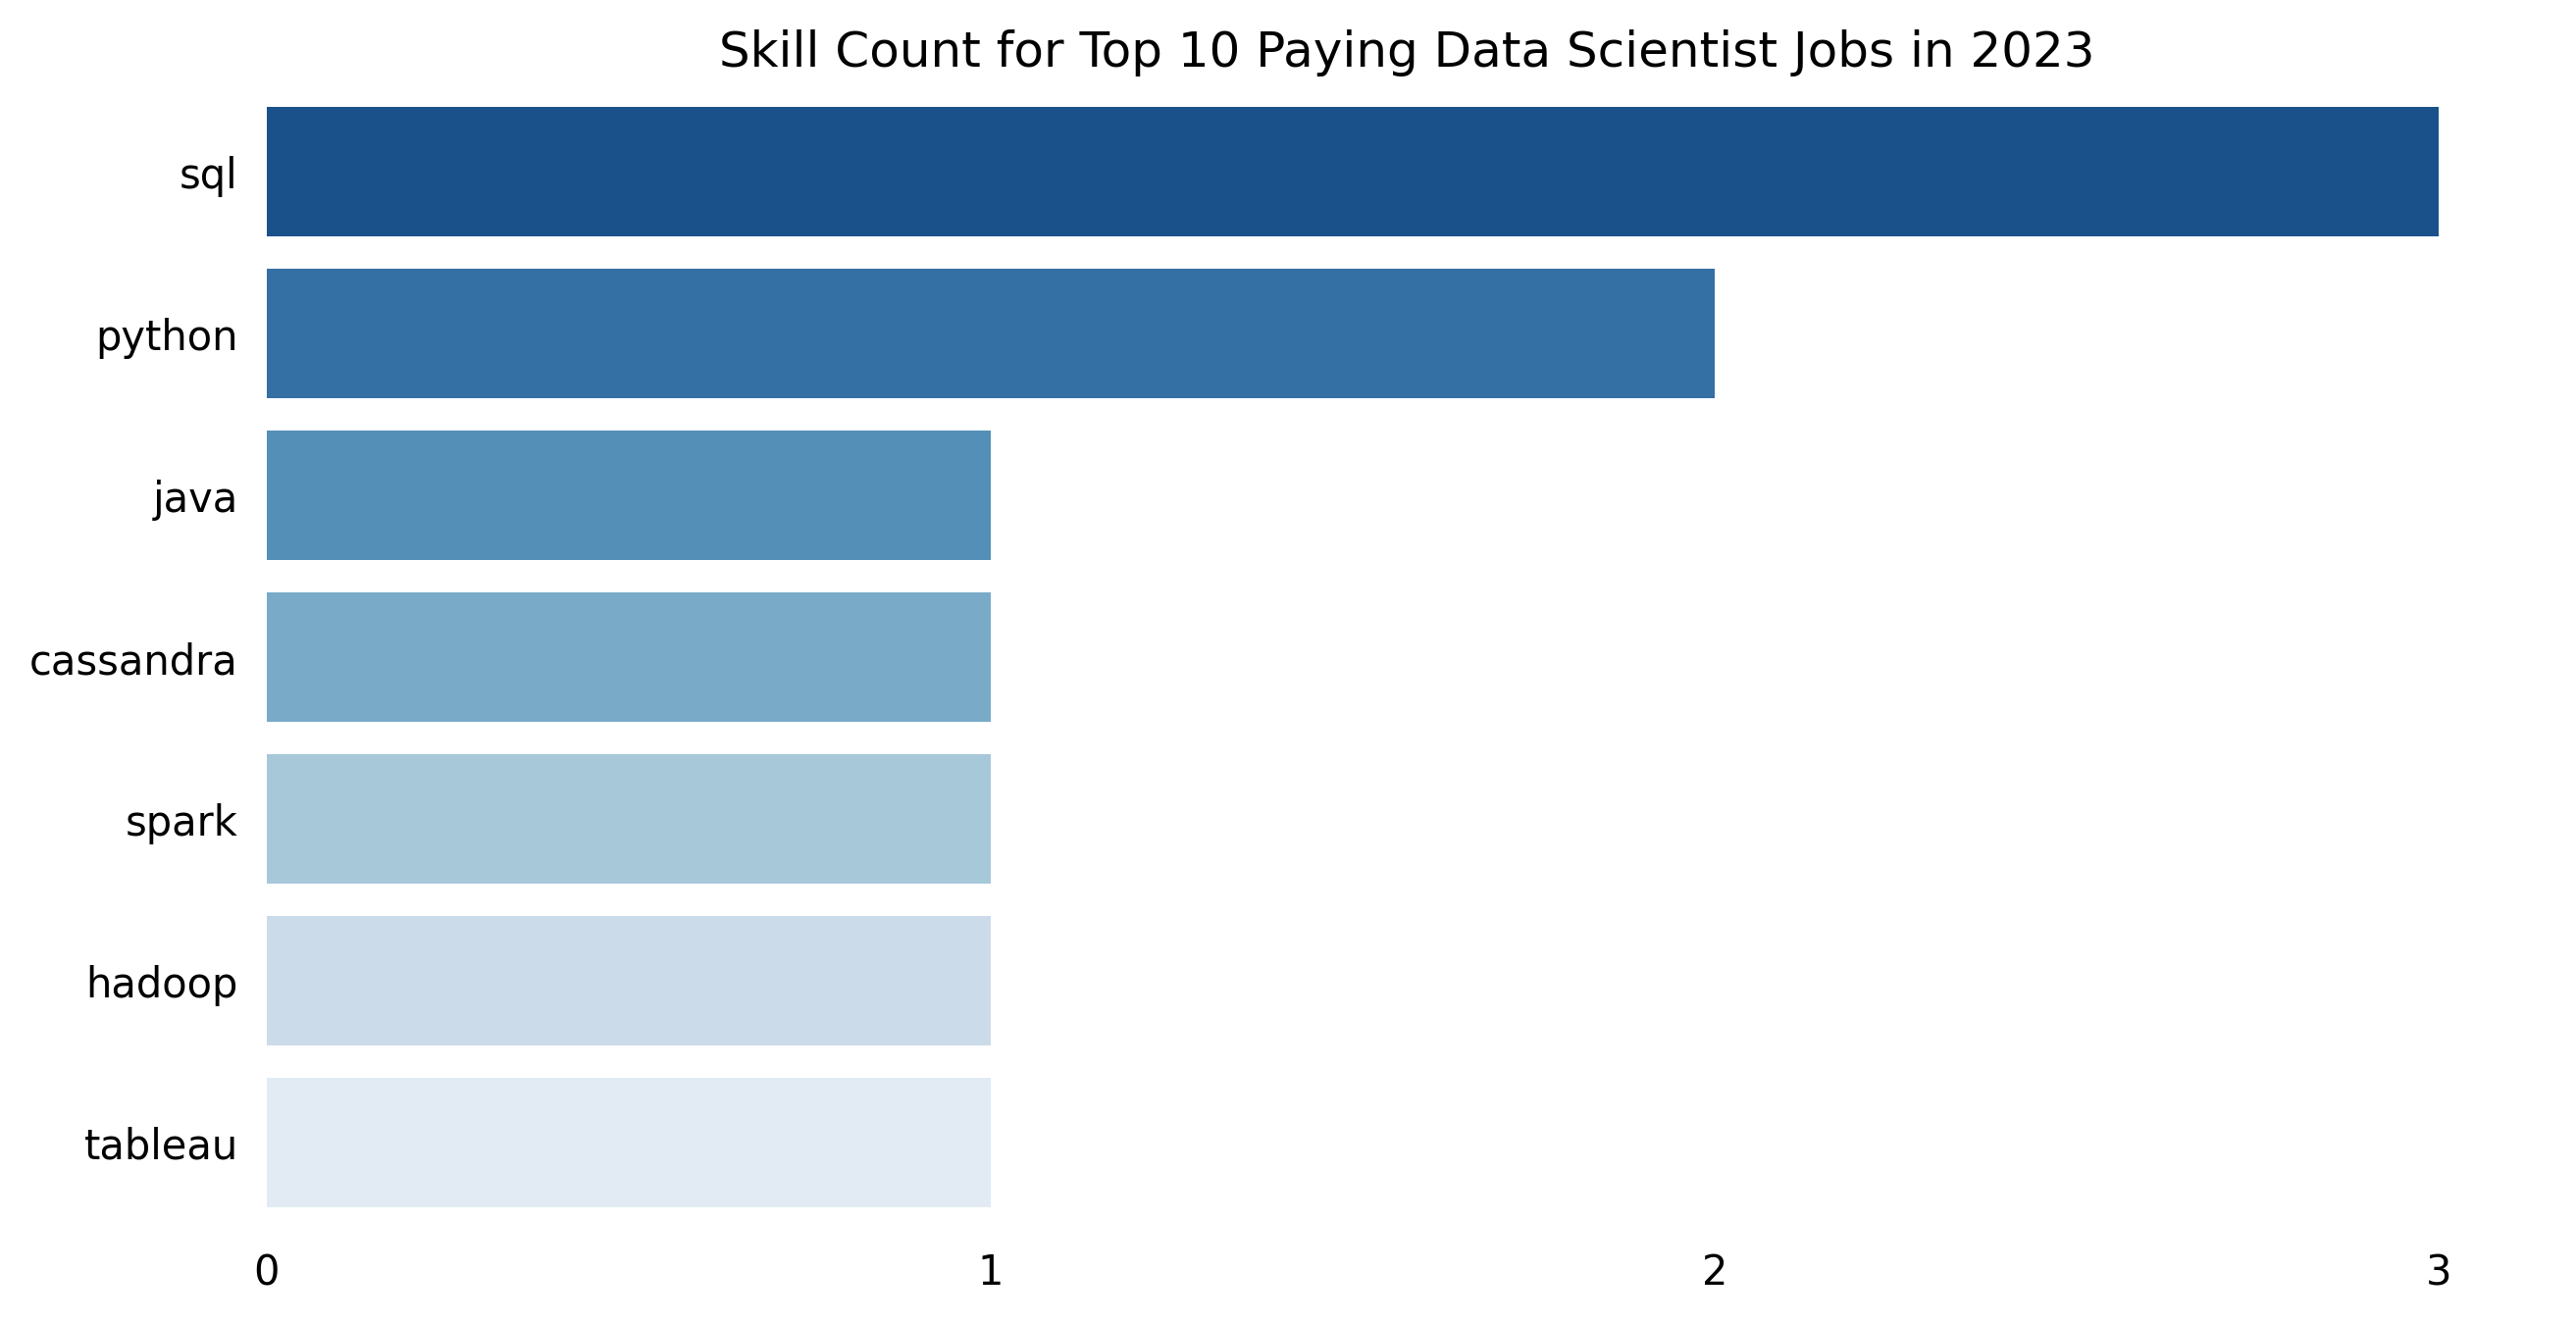

In [5]:
# Set plot size
fig, ax = plt.subplots(figsize=(10,5),dpi=300)

# Create plot
sns.countplot(data=no2, y="skills",palette='Blues_r')

# Remove ticks
ax.tick_params(left=False, bottom=False)               

# Remove borders borders
sns.despine(left=True, bottom=True)     
                
# Turn of x/y labels
plt.xlabel(None)
plt.ylabel(None)

# Specify positions of ticks
plt.xticks([0, 1, 2, 3])  

# Assign Plot Title                           
plt.title("Skill Count for Top 10 Paying Data Scientist Jobs in 2023", fontsize=12)

# Plot
plt.show()

## Load Question 3 Results for top demanded skills are required for these top paying roles?

In [6]:
# Load dataset into a dataframe
# no5 = pd.read_csv('', index_col = 0) | use this to remove index column
no3 = pd.read_csv('project/3_top_demanded_skills_results.csv')

# Display first few rows of the dataframe
no3

,skills,job_location,demand_count
0,python,Anywhere,10390
1,sql,Anywhere,7488
2,r,Anywhere,4674
3,aws,Anywhere,2593
4,tableau,Anywhere,2458
5,python,"Atlanta, GA",1286
6,sql,"Atlanta, GA",1034
7,r,"Atlanta, GA",810
8,sas,"Atlanta, GA",676
9,tableau,"Atlanta, GA",565


**Normalize Demand Count per Locatio then Plot**

In [7]:
# Calculate total demand_count for each job_location
no3['total_demand'] = no3.groupby('job_location')['demand_count'].transform('sum')

# Normalize demand_count based on total_demand
no3['normalized_demand'] = (no3['demand_count'] / no3['total_demand']) *100


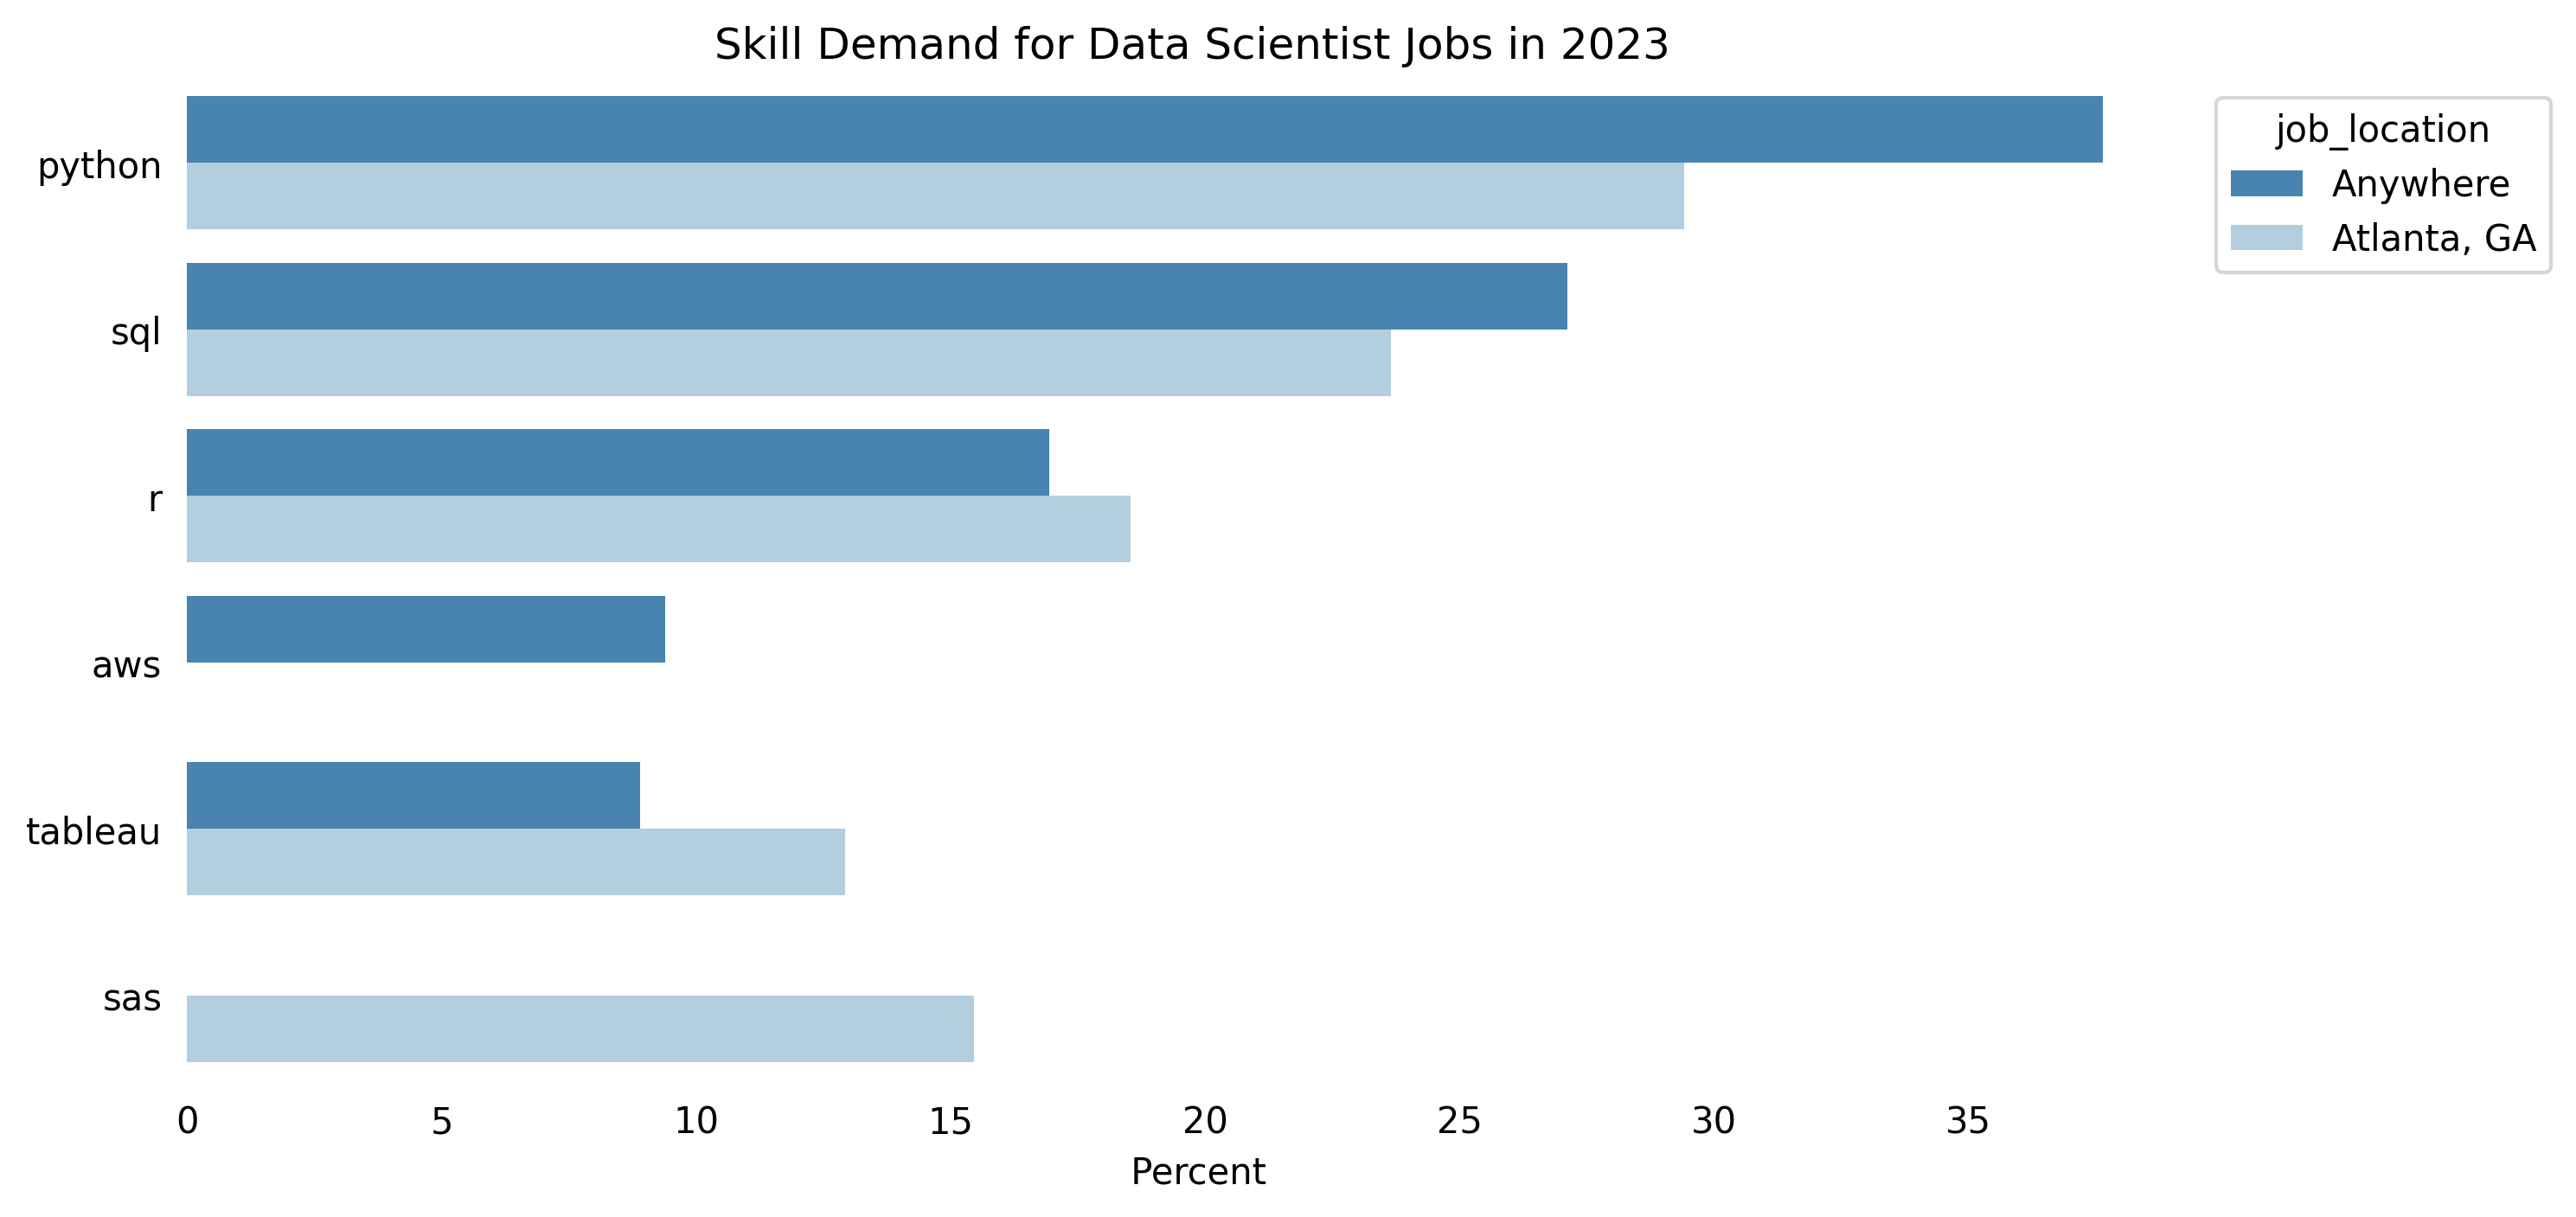

In [8]:

# Set plot size
fig, ax = plt.subplots(figsize=(10,5),dpi=300)

# Create barplot
sns.barplot(data=no3, x='normalized_demand', y="skills",palette='Blues_r', hue='job_location')

# Remove ticks
ax.tick_params(left=False, bottom=False) 

# Remove borders borders
sns.despine(left=True, bottom=True)                        

# Set legend location
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))   

# Turn of x/y labels
plt.xlabel(' Percent')
plt.ylabel(None)

# Assign Plot Title
plt.title("Skill Demand for Data Scientist Jobs in 2023", fontsize=12)

# Plot
plt.show()




## Load Question 4 Results for top demanded skills based on salary?

In [9]:
# Load dataset into a dataframe
# no5 = pd.read_csv('', index_col = 0) | use this to remove index column
no4 = pd.read_csv('project/4_top_paying_skills_results.csv')

# Display first few rows of the dataframe
no4

,skills,job_location,salary_avg
0,gdpr,Anywhere,217738
1,golang,Anywhere,208750
2,atlassian,Anywhere,189700
3,selenium,Anywhere,180000
4,opencv,Anywhere,172500
5,tidyverse,"Atlanta, GA",186500
6,bigquery,"Atlanta, GA",175023
7,kubernetes,"Atlanta, GA",172500
8,visio,"Atlanta, GA",172500
9,jira,"Atlanta, GA",172500


**Plot Top Skills by Based on salary**

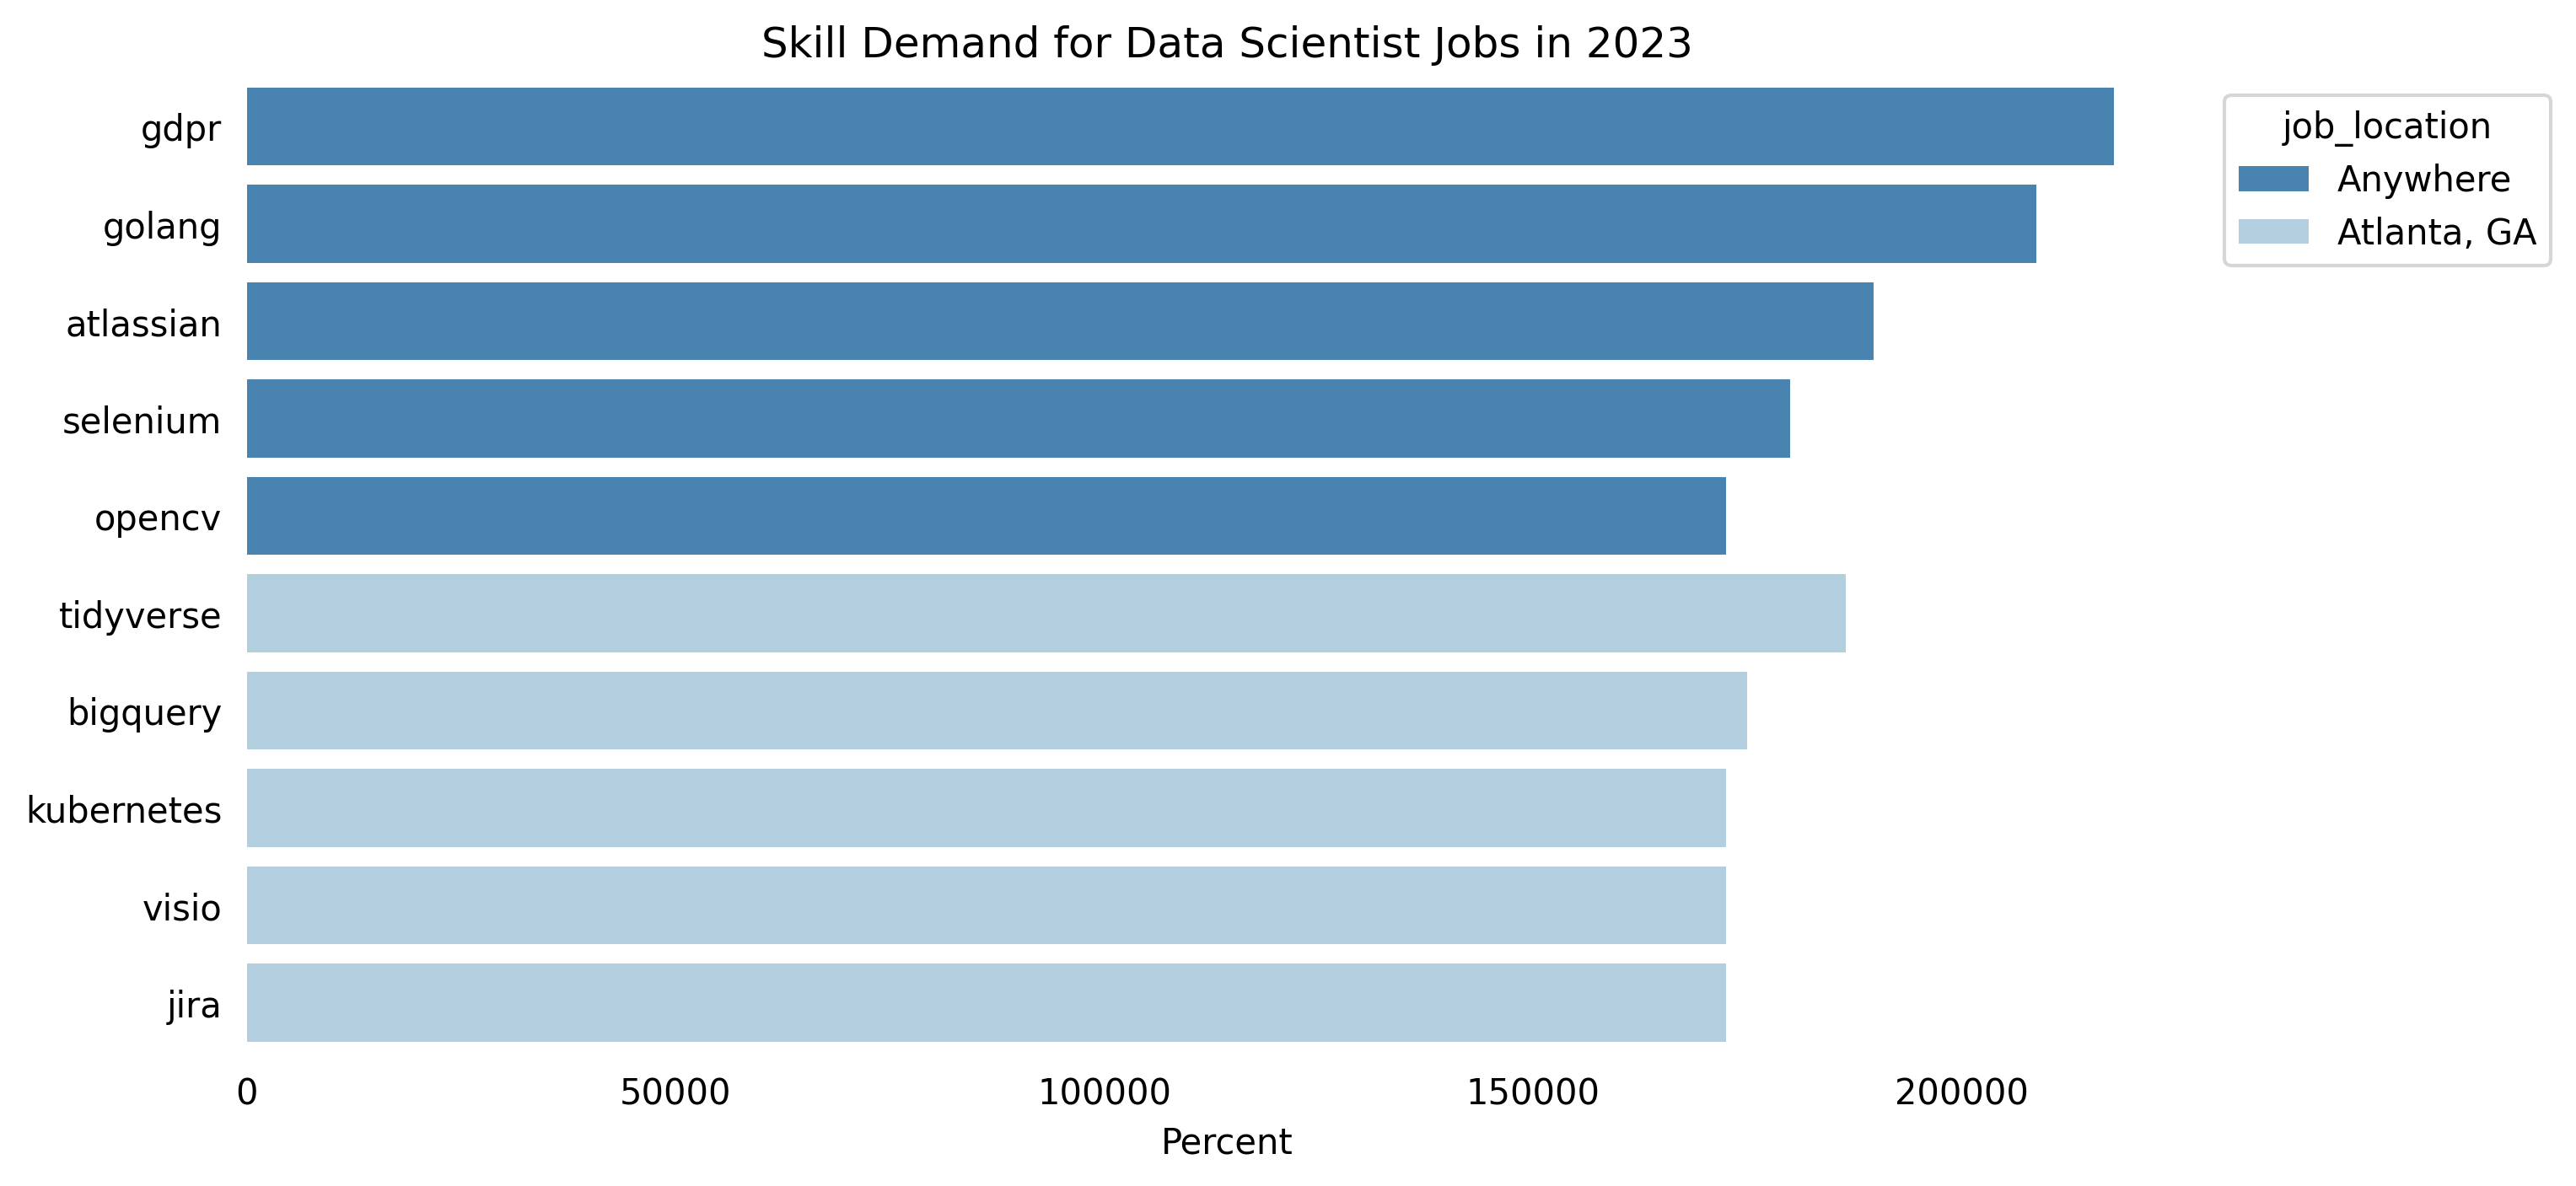

In [10]:
# Set plot size
fig, ax = plt.subplots(figsize=(10,5),dpi=300)

# Create barplot
sns.barplot(data=no4, x='salary_avg', y="skills",palette='Blues_r', hue='job_location')

# Remove ticks
ax.tick_params(left=False, bottom=False) 

# Remove borders borders
sns.despine(left=True, bottom=True)                        

# Set legend location
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))   

# Turn of x/y labels
plt.xlabel('Percent')
plt.ylabel(None)

# Assign Plot Title
plt.title("Skill Demand for Data Scientist Jobs in 2023", fontsize=12)

# Plot
plt.show()


## Load Question 5 Results for Top in-demand skills with high average salaries 

In [11]:
# Load dataset into a dataframe
# no5 = pd.read_csv('', index_col = 0) | use this to remove index column
no5 = pd.read_csv('project/5_top_optimal_skills_results.csv')

# Display first few rows of the dataframe
no5

,skills,job_location,demand_count,avg_salary
0,c,Anywhere,48,164865
1,go,Anywhere,57,164691
2,qlik,Anywhere,15,164485
3,looker,Anywhere,57,158715
4,airflow,Anywhere,23,157414
5,bigquery,"Atlanta, GA",22,175023
6,tensorflow,"Atlanta, GA",12,149333
7,tableau,"Atlanta, GA",39,149127
8,sql,"Atlanta, GA",83,146342
9,spark,"Atlanta, GA",27,146087


**Plot Top Skills by Based on salary**

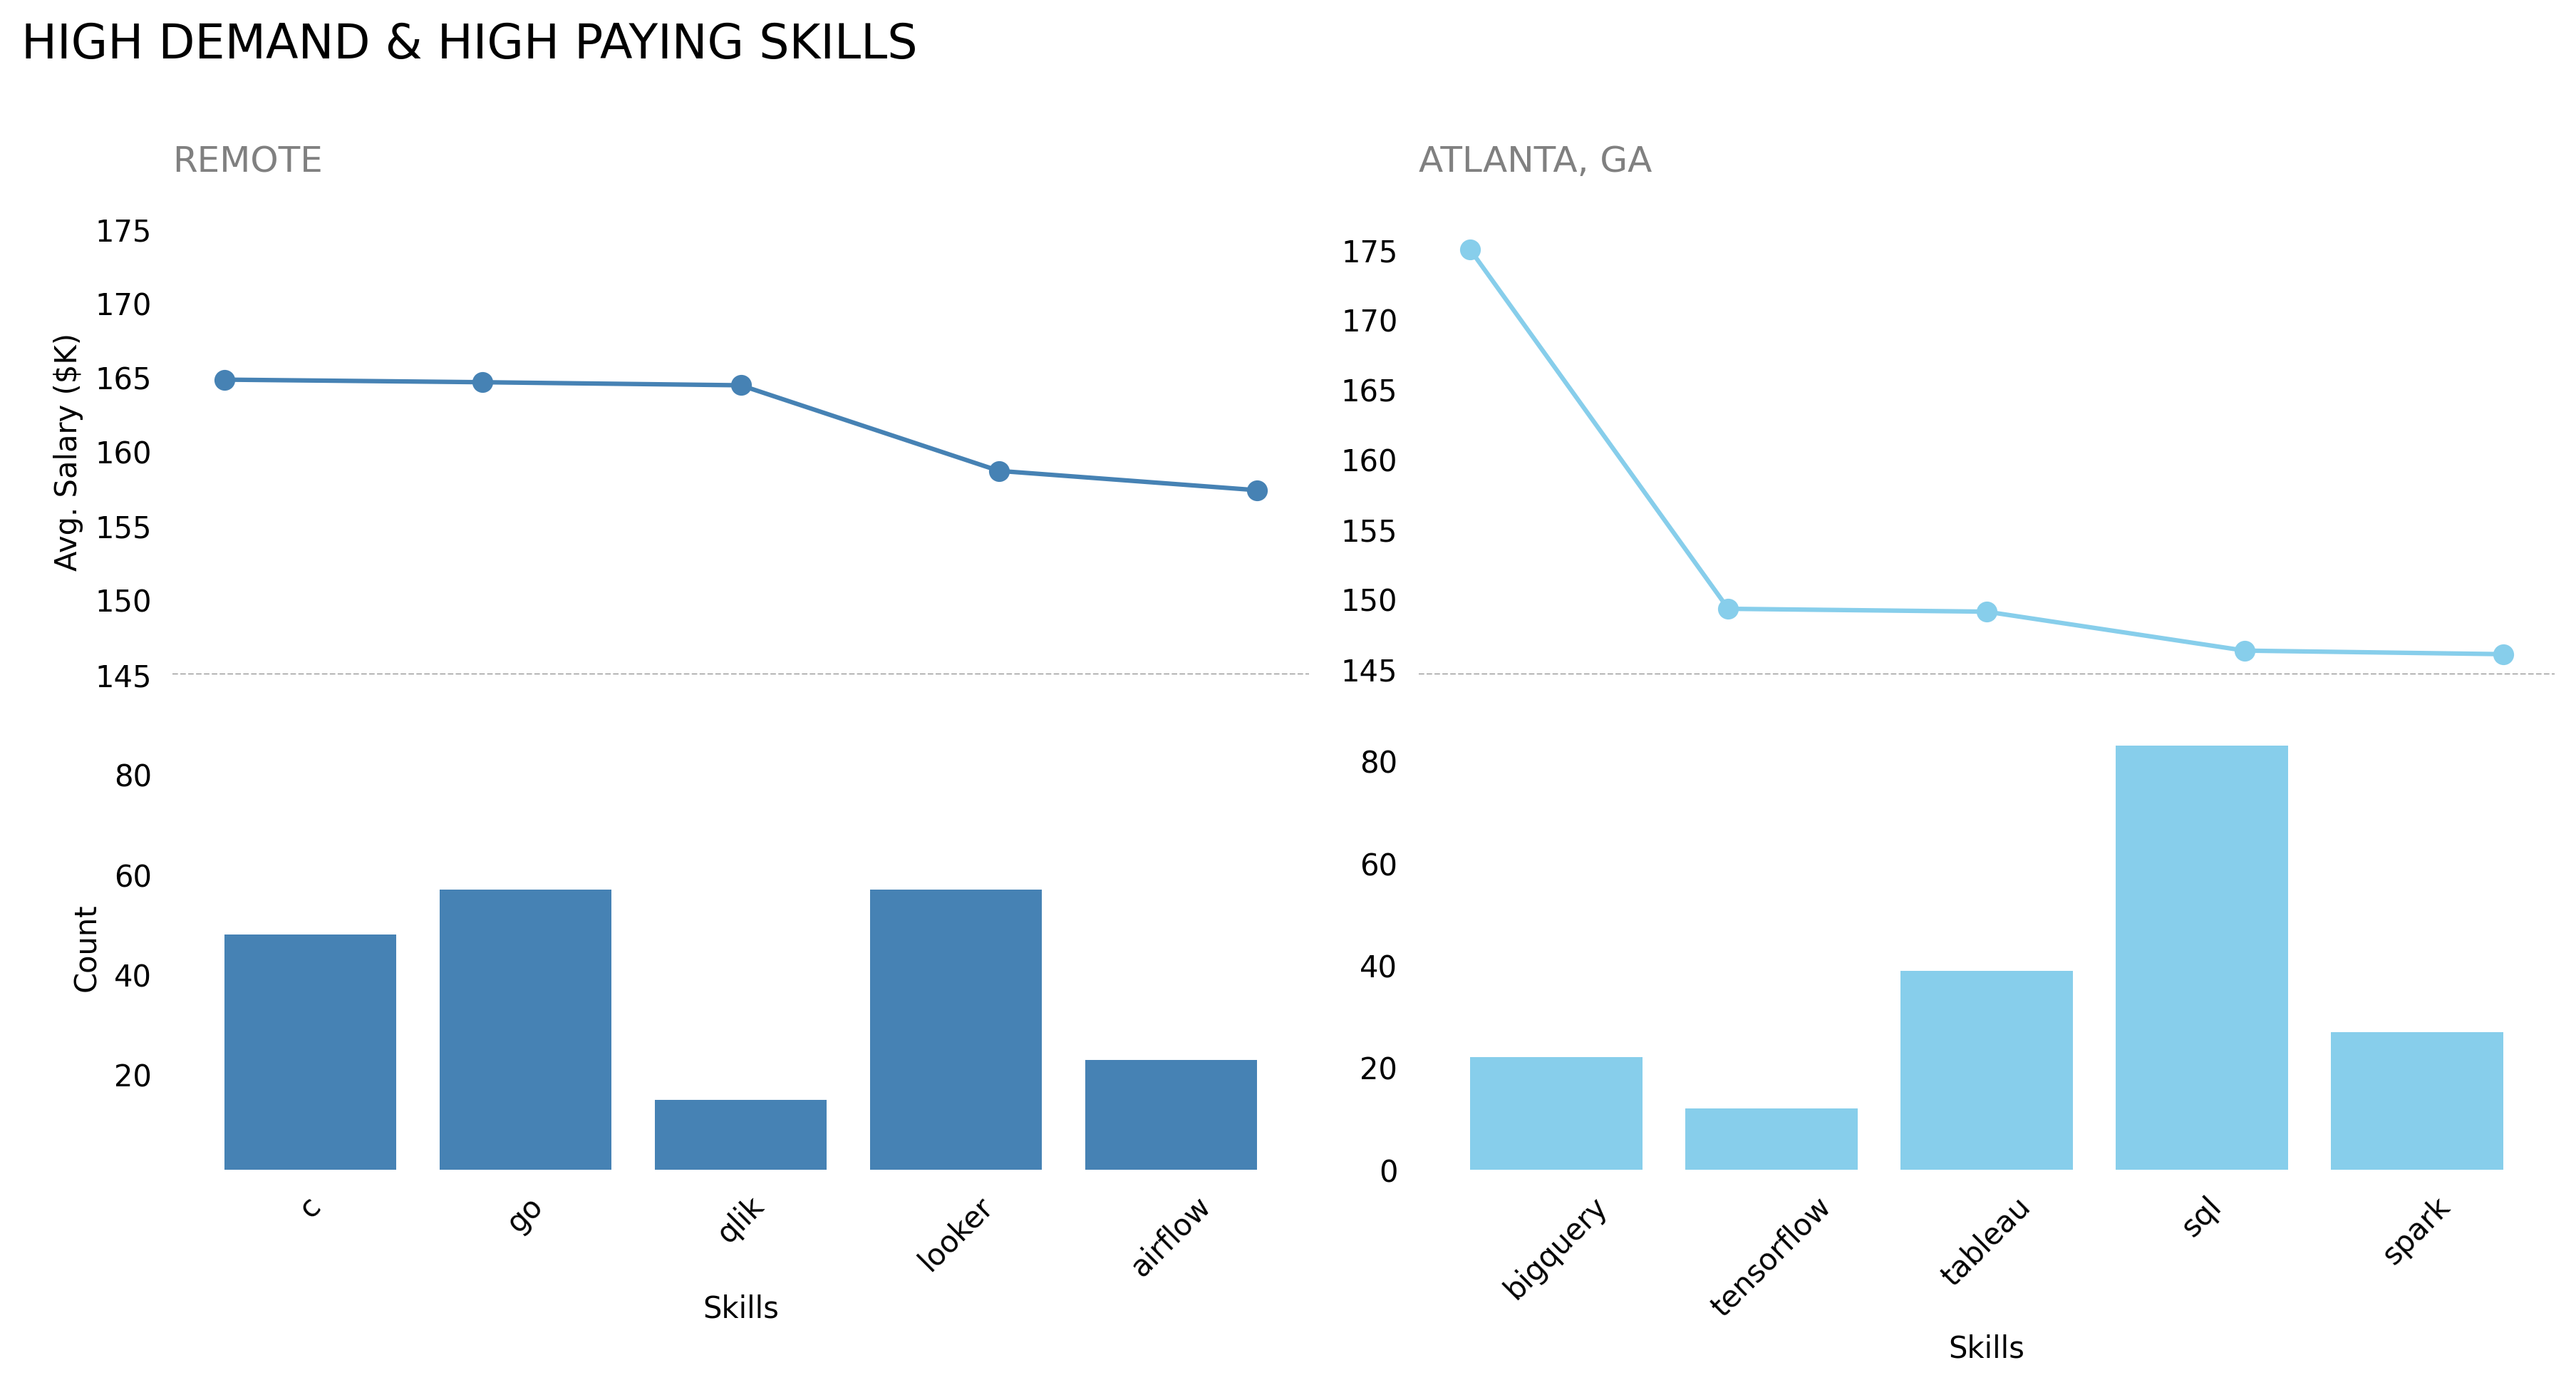

In [79]:

import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

# Function to format y-tick labels for line plot
def y_formatter(y, pos):
    if y >= 1000:
        return f'{int(y / 1000)}'
    else:
        return str(y)


# Separate data by location
no5_anywhere = no5[no5['job_location'] == 'Anywhere']
no5_atlanta = no5[no5['job_location'] == 'Atlanta, GA']

# Create subplots with shared x-axis
fig = plt.figure(figsize=(12, 6), dpi=300)

# Adjust height ratios and width ratios as needed
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])  


# Add a title in the top left corner
fig.text(0, 1, 'HIGH DEMAND & HIGH PAYING SKILLS\n', fontsize=16)


# Plot for Anywhere location
ax1 = plt.subplot(gs[0])
ax1.plot(no5_anywhere['skills'], no5_anywhere['avg_salary'], marker='o', color='steelblue')
ax1.set_xlabel(None)
ax1.set_ylabel('Avg. Salary ($K)')
ax1.set_title('REMOTE\n', loc='left',color='gray')
ax1.tick_params(left=False, bottom=False) 
ax1.set_xticklabels([])
ax1.set_ylim(145000,175000)

# Set the y-axis major formatter
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(y_formatter))
# Draw horizontal divider
ax1.axhline(y=ax1.get_ylim()[0], color='gray', linestyle='--', linewidth=0.5)


ax2 = plt.subplot(gs[2])
ax2.bar(no5_anywhere['skills'], no5_anywhere['demand_count'], color='steelblue')
ax2.set_xlabel('Skills')
ax2.set_ylabel('Count')
ax2.tick_params(left=False, bottom=False) 
ax2.set_ylim(1,90)

# Plot for Atlanta, GA location
ax3 = plt.subplot(gs[1])
ax3.plot(no5_atlanta['skills'], no5_atlanta['avg_salary'], marker='o', color='skyblue')
ax3.set_xlabel(None)
ax3.set_title('ATLANTA, GA\n', loc='left',color='gray')
ax3.tick_params(left=False, bottom=False) 
ax3.set_xticklabels([])
# Set the y-axis major formatter
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(y_formatter))
ax3.axhline(y=ax3.get_ylim()[0], color='gray', linestyle='--', linewidth=0.5)

ax4 = plt.subplot(gs[3])
ax4.bar(no5_atlanta['skills'], no5_atlanta['demand_count'], color='skyblue')
ax4.set_xlabel('Skills')

ax4.tick_params(left=False, bottom=False) 

# Remove borders
sns.despine(left=True, bottom=True)  

# Set x-axis labels for the bottom plots
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax4.get_xticklabels(), rotation=45)
plt.tight_layout()

plt.show()
